<a href="https://colab.research.google.com/github/husnainsr/Pytorch-Learning/blob/main/Basic_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


# This is very basic Neural Network Model Ill change it as I progress

In [2]:
#This class will inehrit the nn.Module
class Model(nn.Module):
  # Input Layer will be 4 features
  # Hidden Layer1 (number of nuerons)
  # Hidden Layer2 (Number of neurons)
  #output in this case there are 3 class so it will be 3
  def __init__(self,inp_features=4,h1=11,h2=7,out_features=3):
    super().__init__() #instaniate our NN.Model
    self.fc1 = nn.Linear(inp_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [3]:
torch.manual_seed(42)
model =Model()

# Lets Prepare the data for the model

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
print(df['species'].unique())


['setosa' 'versicolor' 'virginica']


In [7]:
#Lets convert it into numerical
df['species']= df['species'].replace('setosa',0.0)
df['species']= df['species'].replace('versicolor',1.0)
df['species']= df['species'].replace('virginica',2.0)
df['species'].unique()


<ipython-input-7-3c6b8ca2e23d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species']= df['species'].replace('virginica',2.0)


array([0., 1., 2.])

In [8]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [9]:
X = df.drop('species',axis=1)
y = df['species']

In [10]:
#Now lets convert this into numpy arrays
X = X.values
y = y.values

In [11]:
X.dtype

dtype('float64')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [26]:
# converted X features into tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)



In [27]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)



In [28]:
cirterion = nn.CrossEntropyLoss()
#optimzer is adam , lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [30]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=11, bias=True)
  (fc2): Linear(in_features=11, out_features=7, bias=True)
  (out): Linear(in_features=7, out_features=3, bias=True)
)>

In [31]:
# Train our model
epochs = 1000
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train)
  loss= cirterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch {i+1} and loss {loss}')

  #Do some back propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch 1 and loss 1.1157443523406982
Epoch 11 and loss 1.0604842901229858
Epoch 21 and loss 0.9767084717750549
Epoch 31 and loss 0.8285820484161377
Epoch 41 and loss 0.7137216329574585
Epoch 51 and loss 0.6096559166908264
Epoch 61 and loss 0.49973538517951965
Epoch 71 and loss 0.3818527162075043
Epoch 81 and loss 0.28257909417152405
Epoch 91 and loss 0.21657685935497284
Epoch 101 and loss 0.1772969663143158
Epoch 111 and loss 0.15326528251171112
Epoch 121 and loss 0.13727596402168274
Epoch 131 and loss 0.12574553489685059
Epoch 141 and loss 0.0971297174692154
Epoch 151 and loss 0.06192943826317787
Epoch 161 and loss 0.057241130620241165
Epoch 171 and loss 0.05575624480843544
Epoch 181 and loss 0.0551188662648201
Epoch 191 and loss 0.05464288964867592
Epoch 201 and loss 0.05421162024140358
Epoch 211 and loss 0.053813058882951736
Epoch 221 and loss 0.053432416170835495
Epoch 231 and loss 0.053064025938510895
Epoch 241 and loss 0.05270688608288765
Epoch 251 and loss 0.05236078426241875
Epo

Text(0, 0.5, 'Loss/error')

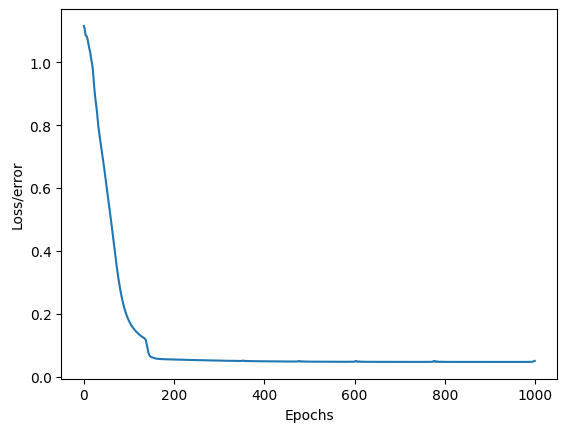

In [37]:
plt.plot(range(epochs),losses)
plt.xlabel("Epochs")
plt.ylabel("Loss/error")